In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [94]:
train_df = pd.read_csv(r"input/train.csv")
test_df = pd.read_csv(r"input/test.csv")
store_df = pd.read_csv(r"input/store.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [97]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


         Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1115         1          4  2015-07-30   5020        546     1      1   
2230         1          3  2015-07-29   4782        523     1      1   
3345         1          2  2015-07-28   5011        560     1      1   
4460         1          1  2015-07-27   6102        612     1      1   
5575         1          7  2015-07-26      0          0     0      0   
6690         1          6  2015-07-25   4364        500     1      0   
7805         1          5  2015-07-24   3706        459     1      0   
8920         1          4  2015-07-23   3769        503     1      0   
10035        1          3  2015-07-22   3464        463     1      0   
11150        1          2  2015-07-21   3558        469     1      0   
12265        1          1  2015-07-20   4395        526     1      0   
13380        1          7  2015-07-19      0          0     0   

Store            942
DayOfWeek        942
Date             942
Sales            942
Customers        942
Open             942
Promo            942
StateHoliday     942
SchoolHoliday    942
dtype: int64

In [99]:
train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [100]:
train_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [157]:
def clean_df(df):
    #Let's keep the data.
    #Lets convert the StateHoliday into multiple integer values
    df['StateHoliday'] = df['StateHoliday'].map({'0':0,'a':1,'b':2,'c':3})
    df.Assortment = df.Assortment.map({'a':0,'b':1,'c':2})
    df.StoreType = df.StoreType.map({'a':0,'b':1,'c':2,'d':3})
    return df

In [102]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [103]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [104]:
store_df.head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [105]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [106]:
store_df.shape

(1115, 10)

In [107]:
def clean_store(df):
    df.fillna(0,inplace=True)
    return df

In [108]:
store_df = clean_store(store_df)

In [109]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [110]:
#Lets see if the stores are more in store_df or train_df
print(store_df['Store'].nunique())
print(train_df['Store'].nunique()) 

1115
1115


In [111]:
store_df.shape

(1115, 10)

In [112]:
train_df.shape

(1017209, 9)

In [167]:
final_df = pd.merge(train_df,store_df,how='inner',on='Store')

In [168]:
X_train.isna().sum()

const                             0
Store                             0
DayOfWeek                         0
Promo                             0
StateHoliday                 112120
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
Next Day Holiday                  1
Prev Day Holiday                  1
dtype: int64

In [114]:
final_df.shape

(1017209, 18)

In [115]:
train_df.shape

(1017209, 9)

In [116]:
final_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [117]:
final_df = final_df[final_df['Sales'] > 0]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


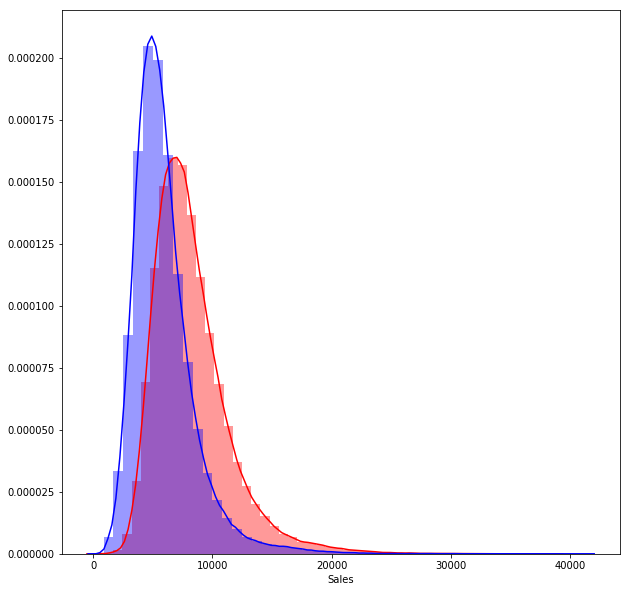

In [118]:
plt.figure(figsize=(10,10))
sns.distplot(final_df[final_df.Promo==1].Sales,color='r')
sns.distplot(final_df[final_df.Promo==0].Sales,color='b')

In [119]:
promo_sales_mean = final_df[final_df.Promo==1].Sales.mean()
non_promo_sales_mean = final_df[final_df.Promo==0].Sales.mean()
print("Promo Sales Mean : ",promo_sales_mean)
print("Non Promo Sales Mean : ",non_promo_sales_mean)


Promo Sales Mean :  8228.739730679934
Non Promo Sales Mean :  5929.826183034807


In [120]:
#from the above it shows that Sales values are different in promo days vs nor promo days

#In the database, we see that there are some values which are not following the above rule
#TO prove the above, we need to do a hypothesis testing
#The NULL Hypothesis would say that the sales means are same

from scipy import stats
stats.ttest_ind(final_df[final_df.Promo == 1].Sales,
               final_df[final_df.Promo==0].Sales)

Ttest_indResult(statistic=363.8948133353385, pvalue=0.0)

In [121]:
#Since P value is less that 0.05, we can say with 95% confidence that NULL Hupothesis is not true. 
#Hence our assumptions are proven

In [122]:
#lets analyse state holidays impact on sales
final_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [123]:
sch_holiday_sales_mean = final_df[final_df.SchoolHoliday==1].Sales.mean()
no_sch_holiday_sales_mean = final_df[final_df.SchoolHoliday==0].Sales.mean()
print("School Holiday Sales Mean : ",promo_sales_mean)
print("No School Holiday  Sales Mean : ",non_promo_sales_mean)


School Holiday Sales Mean :  8228.739730679934
No School Holiday  Sales Mean :  5929.826183034807


In [124]:
#TO prove the above, we need to do a hypothesis testing
#The NULL Hypothesis would say that the sales means are same

from scipy import stats
stats.ttest_ind(final_df[final_df.SchoolHoliday==1].Sales,
               final_df[final_df.SchoolHoliday==0].Sales)

Ttest_indResult(statistic=35.52691485990639, pvalue=3.027502899644128e-276)

In [125]:
#Since the pvalue is > 0.03, we accept the NULL Hypothesis
#We can now statistically say that there is no difference is Sales on School Holiday Vs Non School Holiday

In [126]:
final_df['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [127]:
final_df['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [128]:
stats.ttest_ind(final_df[final_df.StoreType=='a'].Sales,
               final_df[final_df.StoreType=='b'].Sales)

Ttest_indResult(statistic=-120.90401646683534, pvalue=0.0)

In [129]:
#With this we can also see that store type matter for sales
#Lets check for Assortments now
stats.ttest_ind(final_df[final_df.Assortment=='a'].Sales,
               final_df[final_df.Assortment=='b'].Sales)

Ttest_indResult(statistic=-60.69983763027022, pvalue=0.0)

In [130]:
#With this we can also see that Assortment matter for sales
# lets check for StateHolidays fields 
stats.ttest_ind(final_df[final_df.StateHoliday==1].Sales,
               final_df[final_df.StateHoliday== 0].Sales)

Ttest_indResult(statistic=nan, pvalue=nan)

In [131]:
#State holidays also dir not matter for sales

In [132]:
max_comp_dist = final_df[final_df.CompetitionDistance== final_df.CompetitionDistance.max()].Sales
min_comp_dist = final_df[final_df.CompetitionDistance== final_df.CompetitionDistance.min()].Sales

#Lets try CompetitionDistance
stats.ttest_ind(min_comp_dist,max_comp_dist)

Ttest_indResult(statistic=-21.454716951229454, pvalue=2.906752484685973e-95)

In [133]:
#CompetitionDistance also doesn't matter


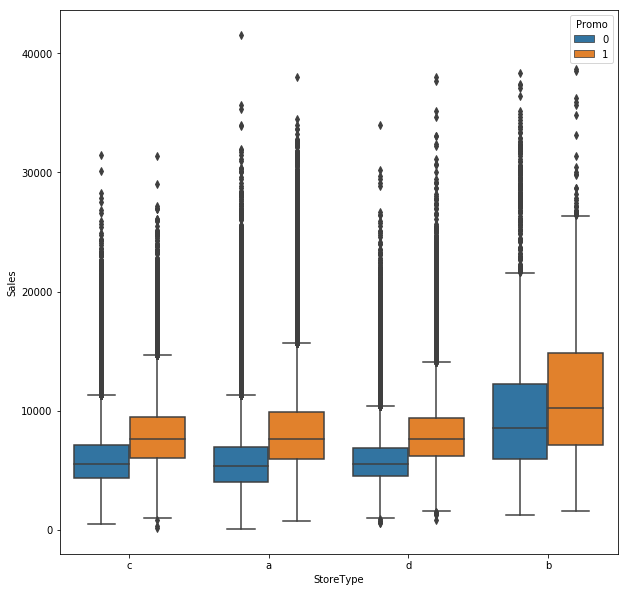

In [134]:
#Lets see the boxplot for various type of store
plt.figure(figsize=(10,10))
sns.boxplot(x='StoreType', y='Sales',hue='Promo',data=final_df)

In [135]:
store_df['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [136]:
#Lets define a function to check which store type has more sales during promo
def isSalesHigherDuringPromos( storeType ):
  store_type_sales_df = final_df[final_df.StoreType == storeType ]
  return stats.ttest_ind( store_type_sales_df[store_type_sales_df.Promo == 1].Sales,
              store_type_sales_df[store_type_sales_df.Promo == 0].Sales )


In [137]:
isSalesHigherDuringPromos('a')

Ttest_indResult(statistic=276.54664703848425, pvalue=0.0)

In [138]:
isSalesHigherDuringPromos('b')

Ttest_indResult(statistic=20.778835096313788, pvalue=1.2915804424519336e-94)

In [139]:
isSalesHigherDuringPromos('c')

Ttest_indResult(statistic=123.88357113852456, pvalue=0.0)

In [140]:
isSalesHigherDuringPromos('d')

Ttest_indResult(statistic=235.83789503346077, pvalue=0.0)

In [141]:
#Sp StoreType 'b' doesn't respond well to Promos

In [142]:
#Are the sales higher when these is a holiday next day?
len(final_df.DayOfWeek.unique())

7

In [143]:
fridaythDaySales = final_df[final_df.DayOfWeek == 5].Sales
overAllSalesPerDay = final_df.Sales / len(final_df.DayOfWeek.unique())
stats.ttest_ind(fridaythDaySales,overAllSalesPerDay)

Ttest_indResult(statistic=1878.830078137384, pvalue=0.0)

In [144]:
#The above test proves that 5th day sales are different that overall sales per day

In [145]:
#Just a test of shift function
final_df['Next Day Holiday'] = final_df['SchoolHoliday'].shift(-1)
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Next Day Holiday
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1.0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1.0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1.0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1.0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0.0


In [146]:
prevH = final_df[final_df['Next Day Holiday'] == 1].Sales
nprevH = final_df[final_df['Next Day Holiday'] == 0].Sales

stats.ttest_ind(prevH,nprevH)


Ttest_indResult(statistic=-47.47635930877121, pvalue=0.0)

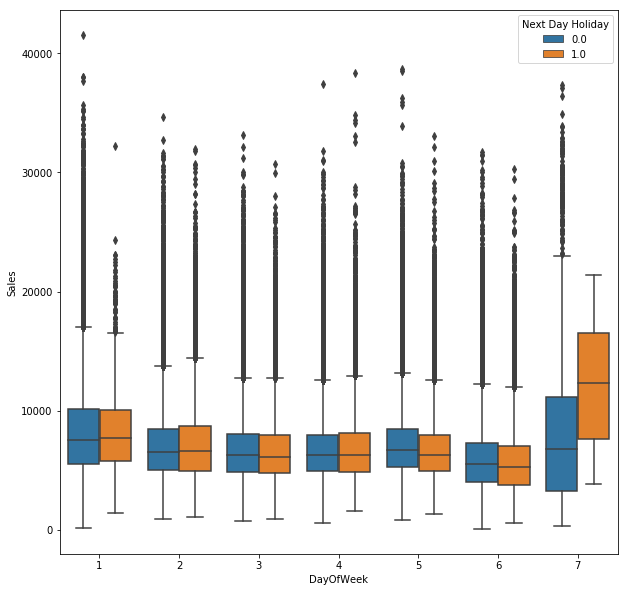

In [147]:
#A day previous to Holiday the sales are different
plt.figure(figsize=(10,10))
sns.boxplot(x='DayOfWeek',y='Sales',hue='Next Day Holiday',data=final_df)

In [148]:
# Let's see a day next to Holiday the sales are different
final_df['Prev Day Holiday'] = final_df['SchoolHoliday'].shift(1)
nextH = final_df[final_df['Prev Day Holiday'] == 1].Sales
nonextH = final_df[final_df['Prev Day Holiday'] == 0].Sales

stats.ttest_ind(nextH,nonextH)


Ttest_indResult(statistic=4.925571623181713, pvalue=8.412994323627107e-07)

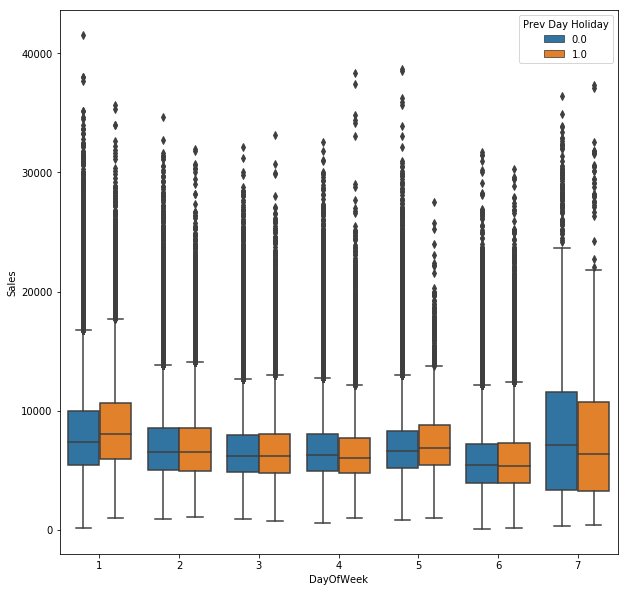

In [149]:
#A day next to Holiday the sales are NO different
plt.figure(figsize=(10,10))
sns.boxplot(x='DayOfWeek',y='Sales',hue='Prev Day Holiday',data=final_df)

In [150]:
len(final_df['CompetitionDistance'].unique())
final_df['CompetitionDistance'].mean()

5444.0254021493765

In [151]:
len(final_df['CompetitionOpenSinceMonth'].unique())


13

In [152]:
len(final_df['CompetitionOpenSinceYear'].unique())


24

In [153]:
#lets drop few columns from the database
final_df.drop(['Date', 'Customers', 'Open','PromoInterval'],axis=1,inplace=True)

In [154]:
final_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Next Day Holiday',
       'Prev Day Holiday'],
      dtype='object')

In [155]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 16 columns):
Store                        844338 non-null int64
DayOfWeek                    844338 non-null int64
Sales                        844338 non-null int64
Promo                        844338 non-null int64
StateHoliday                 844338 non-null object
SchoolHoliday                844338 non-null int64
StoreType                    844338 non-null object
Assortment                   844338 non-null object
CompetitionDistance          844338 non-null float64
CompetitionOpenSinceMonth    844338 non-null float64
CompetitionOpenSinceYear     844338 non-null float64
Promo2                       844338 non-null int64
Promo2SinceWeek              844338 non-null float64
Promo2SinceYear              844338 non-null float64
Next Day Holiday             844337 non-null float64
Prev Day Holiday             844337 non-null float64
dtypes: float64(7), int64(6), object(3)
memory usage: 1

In [ ]:
X_train.isna().sum()

In [158]:
final_df = clean_df(final_df)

In [159]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 16 columns):
Store                        844338 non-null int64
DayOfWeek                    844338 non-null int64
Sales                        844338 non-null int64
Promo                        844338 non-null int64
StateHoliday                 732218 non-null float64
SchoolHoliday                844338 non-null int64
StoreType                    844338 non-null int64
Assortment                   844338 non-null int64
CompetitionDistance          844338 non-null float64
CompetitionOpenSinceMonth    844338 non-null float64
CompetitionOpenSinceYear     844338 non-null float64
Promo2                       844338 non-null int64
Promo2SinceWeek              844338 non-null float64
Promo2SinceYear              844338 non-null float64
Next Day Holiday             844337 non-null float64
Prev Day Holiday             844337 non-null float64
dtypes: float64(8), int64(8)
memory usage: 149.5 MB


In [160]:
Y_train = final_df.Sales

In [161]:
X_train = final_df
X_train.drop('Sales',axis=1,inplace=True)

In [162]:
X_train = sm.add_constant(X_train)

In [163]:
Y_train = np.log(Y_train)

In [169]:
X_train.fillna(0,inplace=True)

In [170]:
X_train.isna().sum()

const                        0
Store                        0
DayOfWeek                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
Next Day Holiday             0
Prev Day Holiday             0
dtype: int64

In [176]:
#Now Lets run the Logistic Regression
lreg = sm.OLS(Y_train,X_train)

In [177]:
model = lreg.fit()

In [178]:
model.params

const                         8.679995
Store                        -0.000003
DayOfWeek                    -0.015282
Promo                         0.324508
StateHoliday                  0.070072
SchoolHoliday                 0.088572
StoreType                     0.002497
Assortment                    0.058738
CompetitionDistance          -0.000004
CompetitionOpenSinceMonth    -0.005710
CompetitionOpenSinceYear      0.000024
Promo2                       10.369569
Promo2SinceWeek               0.003070
Promo2SinceYear              -0.005244
Next Day Holiday             -0.096731
Prev Day Holiday              0.009148
dtype: float64

In [179]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                 1.538e+04
Date:                Tue, 12 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:38:33   Log-Likelihood:            -3.7417e+05
No. Observations:              844338   AIC:                         7.484e+05
Df Residuals:                  844322   BIC:                         7.486e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         8.6800      0.002   5061.447      0.000       8.677       8.683
Store                     -2.552e-06   1.28e-06     -1.998      0.046   -5.06e-06   -4.83e-08
DayOfWeek                    -0.0153      0.000    -57.624      0.000      -0.016      -0.015
Promo                         0.3245      0.001    374.395      0.000       0.323       0.326
StateHoliday                  0.0701      0.009      8.124      0.000       0.053       0.087
SchoolHoliday                 0.0886      0.002     48.884      0.000       0.085       0.092
StoreType                     0.0025      0.000      8.011      0.000       0.002       0.003
Assortment                    0.0587      0.000    135.724      0.000       0.058       0.060
CompetitionDistance       -3.757e-06    5.4e-08    -69.551      0.000   -3.86e-06   -3.65e-06
CompetitionOpenSinceMonth    -0.0057      0.000    -36.804      0.000      -0.006      -0.005
CompetitionOpenSinceYear   2.369e-05   7.13e-07     33.201      0.000    2.23e-05    2.51e-05
Promo2                       10.3696      0.730     14.201      0.000       8.938      11.801
Promo2SinceWeek               0.0031   4.27e-05     71.944      0.000       0.003       0.003
Promo2SinceYear              -0.0052      0.000    -14.452      0.000      -0.006      -0.005
Next Day Holiday             -0.0967      0.002    -59.314      0.000      -0.100      -0.094
Prev Day Holiday              0.0091      0.002      5.921      0.000       0.006       0.012
==============================================================================
Omnibus:                    12046.497   Durbin-Watson:                   0.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23052.340
Skew:                           0.004   Prob(JB):                         0.00
Kurtosis:                       3.809   Cond. No.                     1.70e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""